In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import data

path = r'/Users/alejandroguillen/Documents/Instacart Basket Analysis'

In [3]:
insta_data = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','insta_data_excluded.pkl'))

In [4]:
insta_data.head()

,order_id,user_id,gender,age,state,region,order_number,date_joined,n_dependants,fam_status,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag,exclusion_flag
0,2539329,1,Female,31,Alabama,South,1,2/17/2019,3,married,...,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
1,2398795,1,Female,31,Alabama,South,2,2/17/2019,3,married,...,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
2,473747,1,Female,31,Alabama,South,3,2/17/2019,3,married,...,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
3,2254736,1,Female,31,Alabama,South,4,2/17/2019,3,married,...,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
4,431534,1,Female,31,Alabama,South,5,2/17/2019,3,married,...,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No


In [5]:
insta_data.columns

Index(['order_id', 'user_id', 'gender', 'age', 'state', 'region',
       'order_number', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag', 'median_on_days',
       'frequency_flag', 'exclusion_flag'],
      dtype='object')

In [6]:
#Importing departments_wrangled data
insta_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [7]:
insta_departments.head(21)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
insta_departments.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [9]:
# Renaming Unnamed column
insta_departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)


In [10]:
insta_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
#Merging data

insta_data_complete = insta_data.merge(insta_departments, on='department_id')


In [12]:
#Checking output
insta_data_complete.head()

,order_id,user_id,gender,age,state,region,order_number,date_joined,n_dependants,fam_status,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag,exclusion_flag,department
0,2539329,1,Female,31,Alabama,South,1,2/17/2019,3,married,...,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,beverages
1,2398795,1,Female,31,Alabama,South,2,2/17/2019,3,married,...,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,beverages
2,473747,1,Female,31,Alabama,South,3,2/17/2019,3,married,...,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,beverages
3,2254736,1,Female,31,Alabama,South,4,2/17/2019,3,married,...,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,beverages
4,431534,1,Female,31,Alabama,South,5,2/17/2019,3,married,...,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,beverages


In [13]:
#Reindexing dataframe

columnorder_1= ['order_id', 'department','department_id','user_id', 'gender', 'age', 'state', 'region','order_number', 'date_joined', 'n_dependants', 'fam_status', 'income','orders_day_of_week', 'order_hour_of_day', 'days_since_last_order','product_id', 'add_to_cart_order', 'reordered', 'product_name','aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc','busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order','loyalty_flag', 'mean_price', 'spending_flag', 'median_on_days','frequency_flag', 'exclusion_flag']

In [14]:
insta_data_complete=insta_data_complete[columnorder_1]

In [15]:
insta_data_complete.head()

,order_id,department,department_id,user_id,gender,age,state,region,order_number,date_joined,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag,exclusion_flag
0,2539329,beverages,7,1,Female,31,Alabama,South,1,2/17/2019,...,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
1,2398795,beverages,7,1,Female,31,Alabama,South,2,2/17/2019,...,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
2,473747,beverages,7,1,Female,31,Alabama,South,3,2/17/2019,...,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
3,2254736,beverages,7,1,Female,31,Alabama,South,4,2/17/2019,...,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
4,431534,beverages,7,1,Female,31,Alabama,South,5,2/17/2019,...,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No


## 3.11 Region visualizations

In [16]:
#Creating income flag again since this is a new notebook

max_income = insta_data_complete ['income'].max()

In [17]:
#Creating flag using loc function
insta_data_complete.loc[insta_data_complete['income']>=150000,'income_flag'] = 'High income'

In [18]:
insta_data_complete.loc[(insta_data_complete['income']<150000) & (insta_data_complete['income'] >=60000),'income_flag']= 'Medium income'

In [19]:
insta_data_complete.loc[insta_data_complete['income']<=60000,'income_flag'] = 'Low income'

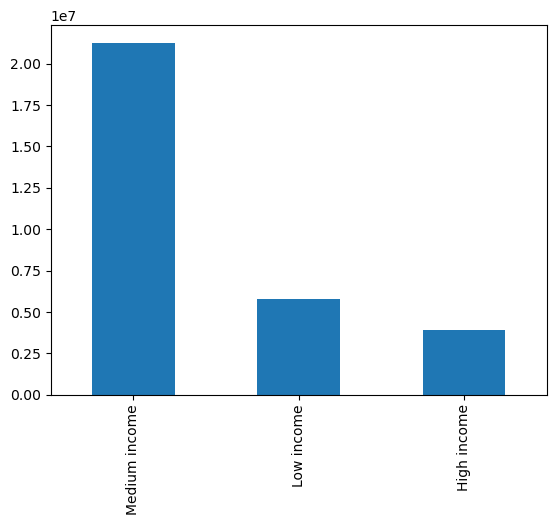

In [20]:
bar_income = insta_data_complete['income_flag'].value_counts().plot.bar()

In [21]:
#Exporting bar chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

In [22]:
#Creating stacked bar chart comparing region and income_flag

region_income = insta_data_complete.groupby(['region', 'income_flag']).size().unstack()

In [23]:
# Calculate the percentage for each income_flag within each region
region_income_percentages = region_income.div(region_income.sum(axis=1), axis=0) * 100


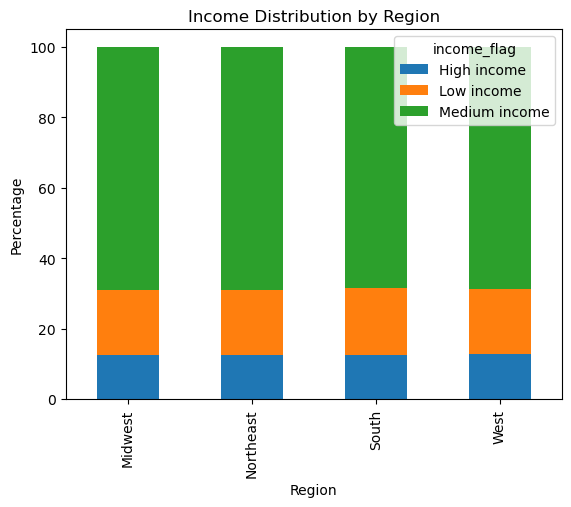

In [25]:
# Create the stacked bar chart
fig, ax = plt.subplots()
region_income_percentages.plot(kind='bar', stacked=True, ax=ax)
# Set labels and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Income Distribution by Region')
plt.show()

In [29]:
#Export percentage bar chart
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income_percentages.png'))
plt.show()

In [30]:
#Creating bar chart to compare regions and gender

gender_counts = insta_data_complete.groupby(['region', 'gender']).size().unstack()


In [31]:
#Calculating percentage in each region
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

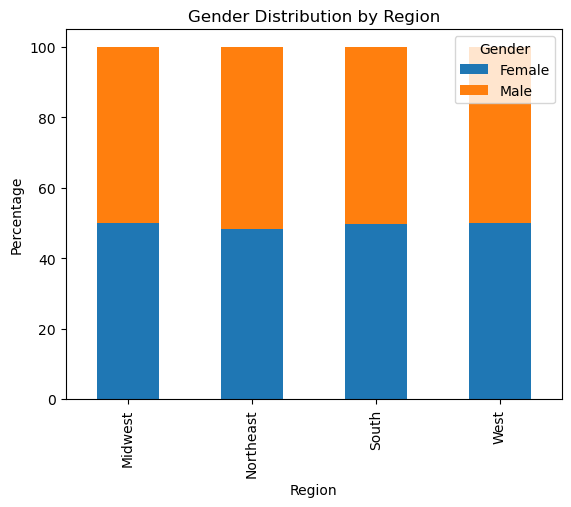

In [32]:
#Creating bar chart
gender_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Gender Distribution by Region')
plt.legend(title='Gender')
plt.show()


In [34]:
#Exporting visualization of gender distribution

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_distribution.png'))

<Figure size 640x480 with 0 Axes>

In [36]:
insta_data_complete.columns

Index(['order_id', 'department', 'department_id', 'user_id', 'gender', 'age',
       'state', 'region', 'order_number', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_on_days', 'frequency_flag', 'exclusion_flag',
       'income_flag'],
      dtype='object')

In [39]:
# Grouping data by region and prices
region_price = insta_data_complete.groupby(['region','price_range_loc']).size().unstack(fill_value=0)

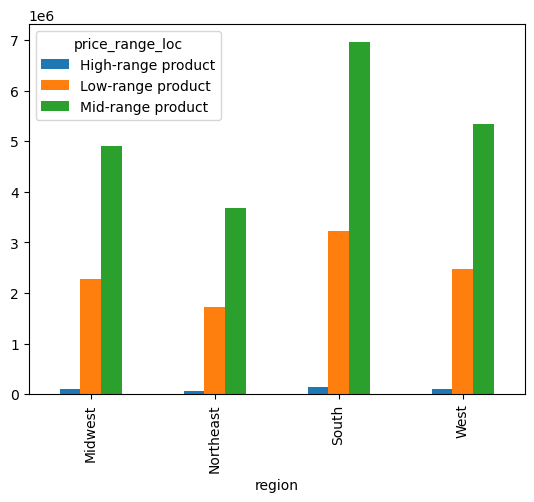

In [40]:
#Creating bar
region_price = region_price.plot.bar(stacked=False)

In [41]:
#Exporting bar chart 
region_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_price.png'))

## 3.12 Descriptive statistics on customer profiles

In [42]:
insta_data_complete.head()

,order_id,department,department_id,user_id,gender,age,state,region,order_number,date_joined,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag,exclusion_flag,income_flag
0,2539329,beverages,7,1,Female,31,Alabama,South,1,2/17/2019,...,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Low income
1,2398795,beverages,7,1,Female,31,Alabama,South,2,2/17/2019,...,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Low income
2,473747,beverages,7,1,Female,31,Alabama,South,3,2/17/2019,...,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Low income
3,2254736,beverages,7,1,Female,31,Alabama,South,4,2/17/2019,...,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Low income
4,431534,beverages,7,1,Female,31,Alabama,South,5,2/17/2019,...,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Low income


In [43]:
# For usage frequency

customer_usage_frequency = insta_data_complete.groupby('user_id')['order_number'].agg(['max', 'mean', 'min'])

In [44]:
#For expenditure
customer_expenditure = insta_data_complete.groupby('user_id')['prices'].agg(['max', 'mean', 'min'])


In [45]:
# Print the aggregated metrics
print("Usage Frequency:")
print(customer_usage_frequency)
print("\nExpenditure:")
print(customer_expenditure)

Usage Frequency:
         max       mean  min
user_id                     
1         10   5.813559    1
10         5   3.223776    1
100        5   3.555556    1
1000       7   3.980583    1
10000     72  35.973443    1
...      ...        ...  ...
99994     11   6.042683    1
99995      5   3.480000    1
99996     12   5.898438    1
99998      5   3.285714    1
99999     34  16.565350    1

[162631 rows x 3 columns]

Expenditure:
               max      mean       min
user_id                               
1        14.000000  6.367535  1.000000
10       24.203125  8.650684  1.000000
100      21.593750  9.858217  2.300781
1000     15.000000  8.408146  1.200195
10000    24.203125  8.045248  1.200195
...            ...       ...       ...
99994    14.296875  8.504519  1.099609
99995    21.296875  7.958086  1.200195
99996    15.000000  7.411110  1.099609
99998    21.093750  9.052037  1.799805
99999    24.203125  7.290051  1.099609

[162631 rows x 3 columns]


In [51]:
#Exporting dataframe

insta_data_complete = insta_data_complete.to_pickle(os.path.join(path,'02 Data','Prepared Data','insta_data_complete_2.pkl'))